In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [30]:
datos = pd.read_excel('./SimpleLinealRegression.xlsx')
datos.head()

,Reduccion de solidos,Reduccion de la demanda de oxigeno
0,3,5
1,7,11
2,11,21
3,15,16
4,18,16


In [31]:
x = datos[['Reduccion de solidos']]
y = datos[['Reduccion de la demanda de oxigeno']]
# print(x.head())
# print(y.head())

##### GRÁFICA DE LA DISPERSIÓN DE LOS DATOS

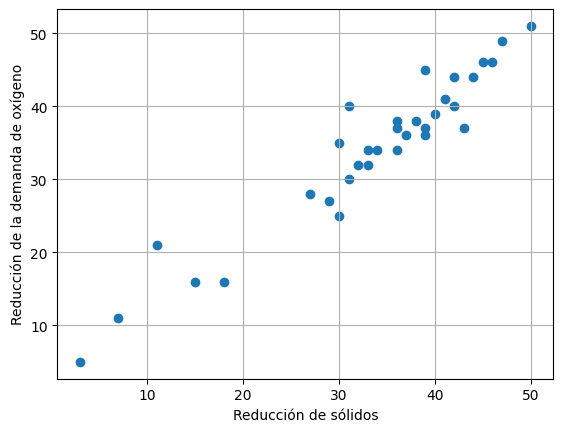

In [32]:
plt.scatter(x,y)
plt.xlabel("Reducción de sólidos") # titulo eje x
plt.ylabel("Reducción de la demanda de oxígeno") # titulo eje y
plt.grid() # mostrar lineas secundarias
plt.show()

##### REGRESIÓN LINEAL SIMPLE SIN UTILIZAR SCIKIT-LEARN

In [33]:
matriz = datos.to_numpy() # == array([3,5],[7,11],[11,21]...) 
# print(matriz)

In [34]:
# Cálculo de 'n' <- TAMAÑO DE LA MATRIZ
n = len(matriz)

# Sumatoria de x
sumatoria_x = np.sum(matriz[:,0])

# Sumatoria de y
sumatoria_y = np.sum(matriz[:,1])

# Promedio de x
promedio_x = sumatoria_x / n

# Promedio de y
promedio_y = sumatoria_y / n

# Sumatoria del producto (x · y)
sumatoria_producto = np.sum(matriz[:,0] * matriz[:,1])

# Sumatoria de x^2
sumatoria_cuadrado_x = np.sum(matriz[:,0] * matriz[:,0])

# Sumatoria de y^2
sumatoria_cuadrado_y = np.sum(matriz[:,1] * matriz[:,1])

print("Cálculo de 'n' (tamaño de la matriz):", n)
print("Sumatoria de x:", sumatoria_x)
print("Sumatoria de y:", sumatoria_y)
print("Promedio de x:", promedio_x)
print("Promedio de y:", promedio_y)
print("Sumatoria del producto (x · y):", sumatoria_producto)
print("Sumatoria de x^2:", sumatoria_cuadrado_x)
print("Sumatoria de y^2:", sumatoria_cuadrado_y)

Cálculo de 'n' (tamaño de la matriz): 33
Sumatoria de x: 1104
Sumatoria de y: 1124
Promedio de x: 33.45454545454545
Promedio de y: 34.06060606060606
Sumatoria del producto (x · y): 41355
Sumatoria de x^2: 41086
Sumatoria de y^2: 41998


In [35]:
%%latex
RESUMEN:
$$n = 33$$
$$\sum_{i=1}^{33}x_i = 1104$$
$$\sum_{i=1}^{33}y_i = 1124$$
$$\sum_{i=1}^{33}x_i·y_i = 41355$$
$$\sum_{i=1}^{33}x_i^2 = 41086$$

<IPython.core.display.Latex object>

In [36]:
%%latex - Pendiente e Intercepto

$$PENDIENTE: b_1 = \frac{n \cdot \sum_{i=1}^{n}x_i y_i - (\sum_{i=1}^{n}x_i) \cdot (\sum_{i=1}^{n}y_i)}{n \cdot \sum_{i=1}^{n}x_i^2 - (\sum_{i=1}^{n}x_i)^2} = \frac{\left(\sum_{i=1}^{n}(x_i - y_i) \cdot (y_i - \overline{y})\right)}{\left(\sum_{i=1}^{n}(x_i - \overline{x})^2\right)} \cdot y$$

$$INTERCEPTO: b_0 = \frac{\sum_{i=1}^{n}y_i - (b_1 \cdot \sum_{i=1}^{n}x_i)}{n} = \overline{y} - b_1\overline{x}$$ 

<IPython.core.display.Latex object>

In [46]:
b1 = ((n * sumatoria_producto) - (sumatoria_x * sumatoria_y)) / ((n * sumatoria_cuadrado_x) - (sumatoria_x * sumatoria_x))
b0 = (sumatoria_y - (b1 * sumatoria_x)) / n

print("Pendiente:", b1)
print("Intercepto:", b0)

Pendiente: 0.9036432105793231
Intercepto: 3.829633197588709


In [38]:
%%latex - Ordenada

$$ Ordenada: a = \overline{y} - b\overline{x}

<IPython.core.display.Latex object>

In [39]:
ordenada = promedio_y - b1*promedio_x
print(ordenada)

3.8296331975887092


In [40]:
%%latex
RECTA DE REGRESIÓN:
$$\hat{y} = b_0 + b_1 · x$$
$$\hat{y} = 3.8296 + 0.9036 · x$$

<IPython.core.display.Latex object>

In [41]:
# Estimación: 
recta_regresion = b0 + b1 * x

In [42]:
%%latex - Error estándard de la regresión (Sxy):
$$S_{xy} = \sqrt{\frac{\sum y^2 - a \sum y - b \sum xy}{n - 2}}


<IPython.core.display.Latex object>

In [51]:
sxy = math.sqrt(((sumatoria_cuadrado_y) - (ordenada*sumatoria_y) - (b1*sumatoria_producto)) / (n - 2))
sxy

3.229537629956136

In [64]:
%%latex - Coeficiente de correlación para la recta de regresión (Coeficiente de Pearson)
$$Coeficiente de Pearson: r = \frac{n \sum xy - (\sum x \sum y)}{\sqrt{[(n \sum x^2) - (\sum x)^2] · [(n \sum y^2) - (\sum y^2)]}}

<IPython.core.display.Latex object>

In [58]:
coef_Pearson = ((n*sumatoria_producto) - (sumatoria_x*sumatoria_y)) / (math.sqrt(((n*sumatoria_cuadrado_x) - pow(sumatoria_x, 2)) * ((n*sumatoria_cuadrado_y) - pow(sumatoria_y, 2))))
coef_Pearson

0.9554793566657453

In [67]:
coef_determinacion = pow(coef_Pearson, 2) * 100
print("Coeficiente de determinación:", coef_determinacion, "%")

Coeficiente de determinación: 91.29408010143865 %


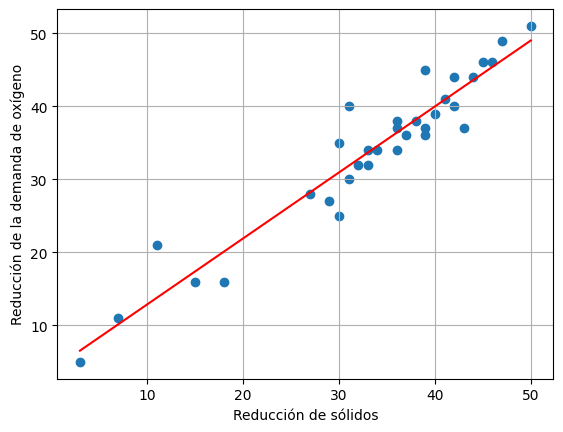

In [28]:
plt.scatter(x, y)
plt.xlabel("Reducción de sólidos")
plt.ylabel("Reducción de la demanda de oxígeno")
plt.grid()
plt.plot(x, recta_regresion, color='red', label='Recta de regresión') # Graficar la recta de regresión